# Weekly Rainfall Statistics

Compute total weekly rainfall as reported by the weather station operated by the Wasserschutzpolizei Zurich.

https://www.stadt-zuerich.ch/pd/de/index/stadtpolizei_zuerich/gewaesser/wetterstationen_vomzuerichsee.html

In [1]:
year = 2017

In [2]:
%matplotlib inline

import papermill as pm

import bikes

In [3]:
data = bikes.get_weather_data(year)

## Sanity Plots

These plots are useful for figuring out if something went wrong while executing this notebook. Useful when it is executed as part of a pipeline or batch job.

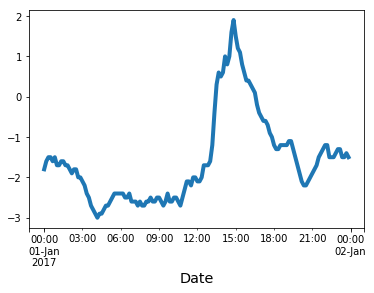

In [4]:
first_day = '%i0101' % year
data[:first_day].Temp.plot()

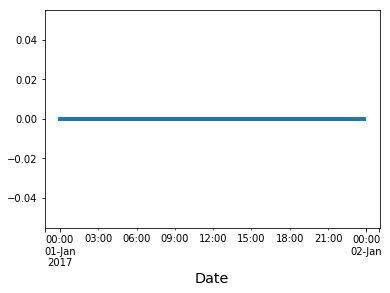

In [5]:
data[:first_day].Rain.plot()

## Date parsing issues

Dates in early January are special as date parsing with `dayfirst=False` will confuse e.g.
12.01.2017 which should be day 12 of January 2017. Not day 1 of December 2017.

If you are getting weird results check the below plot for large jumps or very high temperatures that are unusual for January.

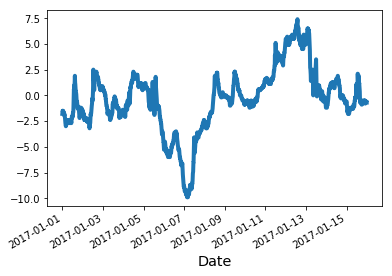

In [6]:
data[:"%i0115" % year].Temp.plot();

# Extract Weather Data

In [7]:
mean_temp = data.resample("W").mean().Temp
total_rain = data.resample("W").sum().Rain

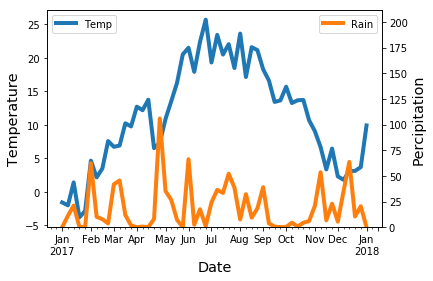

In [8]:
ax = mean_temp.plot()
ax.set_ylabel('Temperature')
ax2 = total_rain.plot.line(ax=ax, secondary_y=True)
ax2.set_ylabel('Percipitation')
ax2.set_ylim([0, total_rain.max() * 2.])
ax.legend(loc=2)
ax2.legend(loc='best')

# Store Results

Store the key results for use in other notebooks.

In [9]:
pm.record("year", year)
pm.record("temp", list(mean_temp))
pm.record('rain', list(total_rain))
pm.record("index", list(mean_temp.index))